In [1]:
import pandas as pd 
data=pd.read_excel('数据清洗01_身份信息_数据缺失清洗.xls')
data.head()

,医保卡号,姓名,身份证号,性别,年龄,联系方式,创建日期
0,A48445***,罗凯,***30119460924**8*,女,NaN,02086541234,2014-05-20 00:00:00
1,A72255***,刘中萍,***22819561004**4*,女,NaN,02086541235,2014-11-13 00:00:00
2,A86096***,周利华,***22719540915**2*,女,NaN,02086541236,2014-12-17 00:00:00
3,A96884***,刘奎,***22419861221**1*,男,NaN,02086541237,2015-01-06 00:00:00
4,A34197***,李大富,***22819500807**7*,男,NaN,02086541238,2015-01-06 00:00:00


In [2]:
# 1.处理性别
for i in data.index:
    num1=data.loc[i,['身份证号']]
    num2=list(num1)
    num3=''.join(num2)
    num=int(num3[-2])
    if num%2==0:
        data.loc[i,['性别']]='女'
    else:
        data.loc[i,['性别']]='男'
        
data.head()

,医保卡号,姓名,身份证号,性别,年龄,联系方式,创建日期
0,A48445***,罗凯,***30119460924**8*,女,NaN,02086541234,2014-05-20 00:00:00
1,A72255***,刘中萍,***22819561004**4*,女,NaN,02086541235,2014-11-13 00:00:00
2,A86096***,周利华,***22719540915**2*,女,NaN,02086541236,2014-12-17 00:00:00
3,A96884***,刘奎,***22419861221**1*,男,NaN,02086541237,2015-01-06 00:00:00
4,A34197***,李大富,***22819500807**7*,男,NaN,02086541238,2015-01-06 00:00:00


In [3]:
# 2.处理年龄
for i in data.index:
    year1=data.loc[i,['身份证号']]
    year2=list(year1)
    year3=''.join(year2)
    year=int(year3[6:10])
    age=2022-year
    data.loc[i,['年龄']]=age
        
data.head()

,医保卡号,姓名,身份证号,性别,年龄,联系方式,创建日期
0,A48445***,罗凯,***30119460924**8*,女,76.0,02086541234,2014-05-20 00:00:00
1,A72255***,刘中萍,***22819561004**4*,女,66.0,02086541235,2014-11-13 00:00:00
2,A86096***,周利华,***22719540915**2*,女,68.0,02086541236,2014-12-17 00:00:00
3,A96884***,刘奎,***22419861221**1*,男,36.0,02086541237,2015-01-06 00:00:00
4,A34197***,李大富,***22819500807**7*,男,72.0,02086541238,2015-01-06 00:00:00


In [ ]:
# 
# for i in data.index:
#     year1=data.loc[i,['身份证号']]
#     year2=list(year1)
#     year3=''.join(year2)
#     year=int(year3[6:10])
#     age=2022-year
#     data.loc[i,['年龄']]=age
        
# data.head(20)

In [6]:
# 3.创建日期数据格式
data['创建日期'] = pd.to_datetime(data['创建日期'])

data.head()

,医保卡号,姓名,身份证号,性别,年龄,联系方式,创建日期
0,A48445***,罗凯,***30119460924**8*,女,76.0,02086541234,2014-05-20
1,A72255***,刘中萍,***22819561004**4*,女,66.0,02086541235,2014-11-13
2,A86096***,周利华,***22719540915**2*,女,68.0,02086541236,2014-12-17
3,A96884***,刘奎,***22419861221**1*,男,36.0,02086541237,2015-01-06
4,A34197***,李大富,***22819500807**7*,男,72.0,02086541238,2015-01-06


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   医保卡号    2000 non-null   object 
 1   姓名      2000 non-null   object 
 2   身份证号    2000 non-null   object 
 3   性别      2000 non-null   object 
 4   年龄      2000 non-null   float64
 5   联系方式    2000 non-null   object 
 6   创建日期    2000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 109.5+ KB


[0.012, 0.157, 0.518, 0.313]


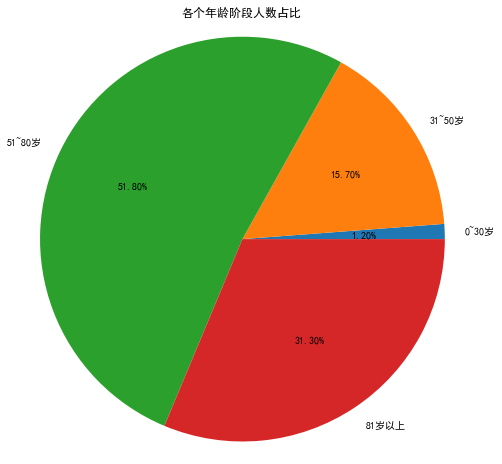

In [30]:
# 4.年龄可视化分析

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

lab=['0~30岁','31~50岁','51~80岁','81岁以上']

a,b,c,d=0,0,0,0
for i in data.index:
    if int(data.loc[i,['年龄']])>0 and int(data.loc[i,['年龄']])<31:
        a+=1
    elif int(data.loc[i,['年龄']])>30 and int(data.loc[i,['年龄']])<51:
        b+=1
    elif int(data.loc[i,['年龄']])>50 and int(data.loc[i,['年龄']])<81:
        c+=1
    else:
        d+=1
li=[round(a/2000,4),round(b/2000,4),round(c/2000,4),round(d/2000,4)]
# print(li)
plt.figure(figsize=(8,8))  # 设置画布大小  
plt.pie(li,labels=lab,autopct='%1.2f%%',normalize=True)

plt.title('各个年龄阶段人数占比')  # 设置标题
plt.axis('equal')

plt.show()  

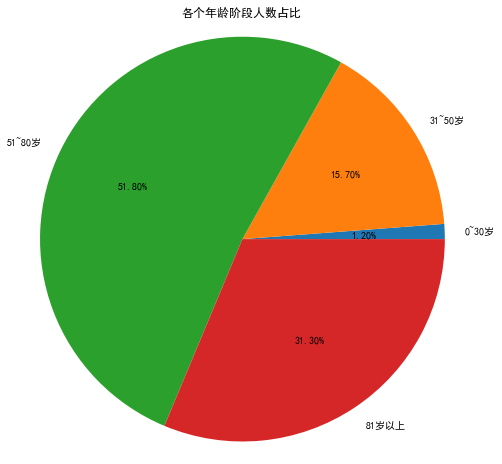

In [7]:
# import pandas as pd 
# data=pd.read_excel('数据清洗01_身份信息_数据缺失清洗.xls')
# # 1.处理性别
# for i in data.index:
#     num1=data.loc[i,['身份证号']]
#     num2=list(num1)
#     num3=''.join(num2)
#     num=int(num3[-2])
#     if num%2==0:
#         data.loc[i,['性别']]='女'
#     else:
#         data.loc[i,['性别']]='男'

# # 2.处理年龄
# for i in data.index:
#     year1=data.loc[i,['身份证号']]
#     year2=list(year1)
#     year3=''.join(year2)
#     year=int(year3[6:10])
#     age=2022-year
#     data.loc[i,['年龄']]=age
        
# # 3.创建日期数据格式
# data['创建日期'] = pd.to_datetime(data['创建日期'])

# # 4.年龄可视化分析
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# lab=['0~30岁','31~50岁','51~80岁','81岁以上']
# a,b,c,d=0,0,0,0
# for i in data.index:
#     if int(data.loc[i,['年龄']])>0 and int(data.loc[i,['年龄']])<31:
#         a+=1
#     elif int(data.loc[i,['年龄']])>30 and int(data.loc[i,['年龄']])<51:
#         b+=1
#     elif int(data.loc[i,['年龄']])>50 and int(data.loc[i,['年龄']])<81:
#         c+=1
#     else:
#         d+=1
# li=[round(a/2000,4),round(b/2000,4),round(c/2000,4),round(d/2000,4)]
# # print(li)
# plt.figure(figsize=(8,8))  # 设置画布大小  
# plt.pie(li,labels=lab,autopct='%1.2f%%',normalize=True)
# plt.title('各个年龄阶段人数占比')  # 设置标题
# plt.axis('equal')
# plt.show()  

In [ ]:
# import pandas as pd 
# data=pd.read_excel('数据清洗01_身份信息_数据缺失清洗.xls')
# for i in data.index:
#     year1=data.loc[i,['身份证号']]
#     year2=list(year1)
#     year3=''.join(year2)
#     year=int(year3[6:10])
#     age=2022-year
#     data.loc[i,['年龄']]=age
# for i in data.index:
#     num1=data.loc[i,['身份证号']]
#     num2=list(num1)
#     num3=''.join(num2)
#     num=int(num3[-2])
#     if num%2==0:
#         data.loc[i,['性别']]='女'
#     else:
#         data.loc[i,['性别']]='男'
# data['创建日期'] = pd.to_datetime(data['创建日期'])
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']  
# plt.rcParams['axes.unicode_minus'] = False  
# lab=['0~30岁','31~50岁','51~80岁','81岁以上']
# a,b,c,d=0,0,0,0
# for i in data.index:
#     if int(data.loc[i,['年龄']])>0 and int(data.loc[i,['年龄']])<31:
#         a+=1
#     elif int(data.loc[i,['年龄']])>30 and int(data.loc[i,['年龄']])<51:
#         b+=1
#     elif int(data.loc[i,['年龄']])>50 and int(data.loc[i,['年龄']])<81:
#         c+=1
#     else:
#         d+=1
# li=[round(a/2000,4),round(b/2000,4),round(c/2000,4),round(d/2000,4)]  
# plt.pie(li,labels=lab,autopct='%1.2f%%',normalize=True)
# plt.axis('equal')
# plt.show()  